In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df = pd.read_csv('team data set drug.csv')
df[0:10]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,DrugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,DrugY
9,43,M,LOW,NORMAL,19.368,DrugY


In [ ]:
x = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values

In [ ]:
#data peprocessing
#In this block we are transforming all the categorical variables for ease of computation.
#This step assigns a unique integer value to each category
#For example at index 1: 'F' being mapped to 0 and 'M' being mapped to 1,at index 2 low bp mapped to 0,high bp mapped to 2,normal to 1
#and at index 3 normal cholestrol is mapped to 0 and high cholestrol is mapped to 1
#we did not transform Na_to_k column because its already in numerical form
from sklearn import preprocessing
sex = preprocessing.LabelEncoder()
sex.fit(['F','M'])
x[:,1] = sex.transform(x[:,1])


BP = preprocessing.LabelEncoder()
BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
x[:,2] = BP.transform(x[:,2])


Chol = preprocessing.LabelEncoder()
Chol.fit([ 'NORMAL', 'HIGH'])
x[:,3] = Chol.transform(x[:,3])

x[0:10]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043],
       [22, 0, 2, 0, 8.607],
       [49, 0, 2, 0, 16.275],
       [41, 1, 1, 0, 11.037],
       [60, 1, 2, 0, 15.171],
       [43, 1, 1, 1, 19.368]], dtype=object)

In [ ]:
df['Dclass']=df["Drug"]
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Dclass
0,23,F,HIGH,HIGH,25.355,DrugY,DrugY
1,47,M,LOW,HIGH,13.093,drugC,drugC
2,47,M,LOW,HIGH,10.114,drugC,drugC
3,28,F,NORMAL,HIGH,7.798,drugX,drugX
4,61,F,LOW,HIGH,18.043,DrugY,DrugY
...,...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC,drugC
196,16,M,LOW,HIGH,12.006,drugC,drugC
197,52,M,NORMAL,HIGH,9.894,drugX,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX,drugX


In [ ]:
def convert_type(value):
       value = value.replace('drugA','0').replace('drugB', '1').replace('drugC', '2').replace('drugX', '3').replace('DrugY', '4')
       return int(value)

In [ ]:
df['Dclass']=df['Dclass'].apply(convert_type)


In [ ]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Dclass
0,23,F,HIGH,HIGH,25.355,DrugY,4
1,47,M,LOW,HIGH,13.093,drugC,2
2,47,M,LOW,HIGH,10.114,drugC,2
3,28,F,NORMAL,HIGH,7.798,drugX,3
4,61,F,LOW,HIGH,18.043,DrugY,4
...,...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC,2
196,16,M,LOW,HIGH,12.006,drugC,2
197,52,M,NORMAL,HIGH,9.894,drugX,3
198,23,M,NORMAL,NORMAL,14.020,drugX,3


In [ ]:
#y is our target variable we are trying to classify.
# Here we chose the drug column.
y = df["Dclass"]

y[0:10]#- if we want to see our first 10 values from Drug column

0    4
1    2
2    2
3    3
4    4
5    3
6    4
7    2
8    4
9    4
Name: Dclass, dtype: int64

In [ ]:
# in this block, we use train_test_split to split data into four arrays x_train, x_test, y_train, y_test
# as test_size=0.3 30% of our data will be used for testing, and the remaining 70% will be used for training
#The random state hyperparameter in the train_test_split() function controls the shuffling process
#thus returning the same set of shuffeled values in the 30% and 70% set giving us same result on each run
n=0.4
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=n, random_state=3)

In [ ]:
dte = DecisionTreeClassifier(criterion="gini", max_depth = 4)

In [ ]:
dte.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [ ]:
# to compare the predicted values with the actual values and evaluate the performance of the classifier.
pt = dte.predict(x_test)
print(pt[0:5])
print(y_test[0:5])

[4 3 3 3 3]
40     4
51     3
139    3
197    3
170    3
Name: Dclass, dtype: int64


In [ ]:
from sklearn import metrics


In [ ]:
print("Confusion Matrix of the decision tree:\n", metrics.confusion_matrix(y_test,pt))
cm=metrics.confusion_matrix(y_test,pt)
print("\nClassification Report\n")
print(metrics.classification_report(y_test, pt))
print("Accuracy of the decision tree: ", metrics.accuracy_score(y_test,pt))

Confusion Matrix of the decision tree:
 [[ 9  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  0  6  0  0]
 [ 0  0  0 25  1]
 [ 0  0  0  0 34]]

Classification Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         6
           3       1.00      0.96      0.98        26
           4       0.97      1.00      0.99        34

    accuracy                           0.99        80
   macro avg       0.99      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80

Accuracy of the decision tree:  0.9875


In [ ]:
#a readable format for confusion matrix.
cm_df = pd.DataFrame(cm,
                     index = ['drugA','drugB','drugC', 'drugX', 'drugY'],
                     columns = ['drugA','drugB','drugC', 'drugX', 'drugY'])

In [ ]:
#Visualization
from matplotlib import pyplot as plt
from sklearn import tree
import seaborn as sns

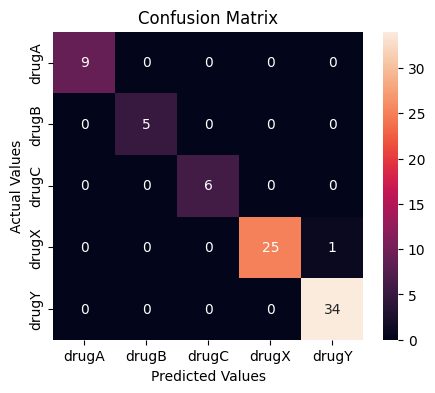

In [ ]:
#Plotting the confusion matrix
figure=plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()
figure.savefig('CM.png')

In [ ]:
from numpy.ma.core import sqrt
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
print("FP=",FP)
print("FN=",FN)
print("TP=",TP)
print("TN=",TN)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print("TPR=",TPR, "/Sensitivity")
# Specificity or true negative rate
TNR = TN/(TN+FP)
print("TNR=",TNR,"/Specificity")
# Precision or positive predictive value
PPV = TP/(TP+FP)
print("PPV=",PPV,"/Precision")
# Negative predictive value
NPV = TN/(TN+FN)
print("NPV=",NPV)
# Fall out or false positive rate
FPR = FP/(FP+TN)
print("FPR=",FPR)
# False negative rate
FNR = FN/(TP+FN)
print("FNR=",FNR)
# False discovery rate
FDR = FP/(TP+FP)
print("FDR=",FDR)
# Overall accuracy for each class
ACC = (TP+TN)/(TP+FP+FN+TN)
print("ACC=",ACC)
MCC=((TP*TN)-(FP*FN)) /np.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))
print("MCC=",MCC)

FP= [0. 0. 0. 0. 1.]
FN= [0. 0. 0. 1. 0.]
TP= [ 9.  5.  6. 25. 34.]
TN= [71. 75. 74. 54. 45.]
TPR= [1.         1.         1.         0.96153846 1.        ] /Sensitivity
TNR= [1.         1.         1.         1.         0.97826087] /Specificity
PPV= [1.         1.         1.         1.         0.97142857] /Precision
NPV= [1.         1.         1.         0.98181818 1.        ]
FPR= [0.         0.         0.         0.         0.02173913]
FNR= [0.         0.         0.         0.03846154 0.        ]
FDR= [0.         0.         0.         0.         0.02857143]
ACC= [1.     1.     1.     0.9875 0.9875]
MCC= [1.         1.         1.         0.97162541 0.97483873]


In [ ]:
#Visualization 1:text representation
text_representation = tree.export_text(dte)
print(text_representation)

|--- feature_4 <= 14.62
|   |--- feature_2 <= 0.50
|   |   |--- feature_0 <= 50.50
|   |   |   |--- class: 0
|   |   |--- feature_0 >  50.50
|   |   |   |--- class: 1
|   |--- feature_2 >  0.50
|   |   |--- feature_3 <= 0.50
|   |   |   |--- feature_2 <= 1.50
|   |   |   |   |--- class: 2
|   |   |   |--- feature_2 >  1.50
|   |   |   |   |--- class: 3
|   |   |--- feature_3 >  0.50
|   |   |   |--- class: 3
|--- feature_4 >  14.62
|   |--- class: 4



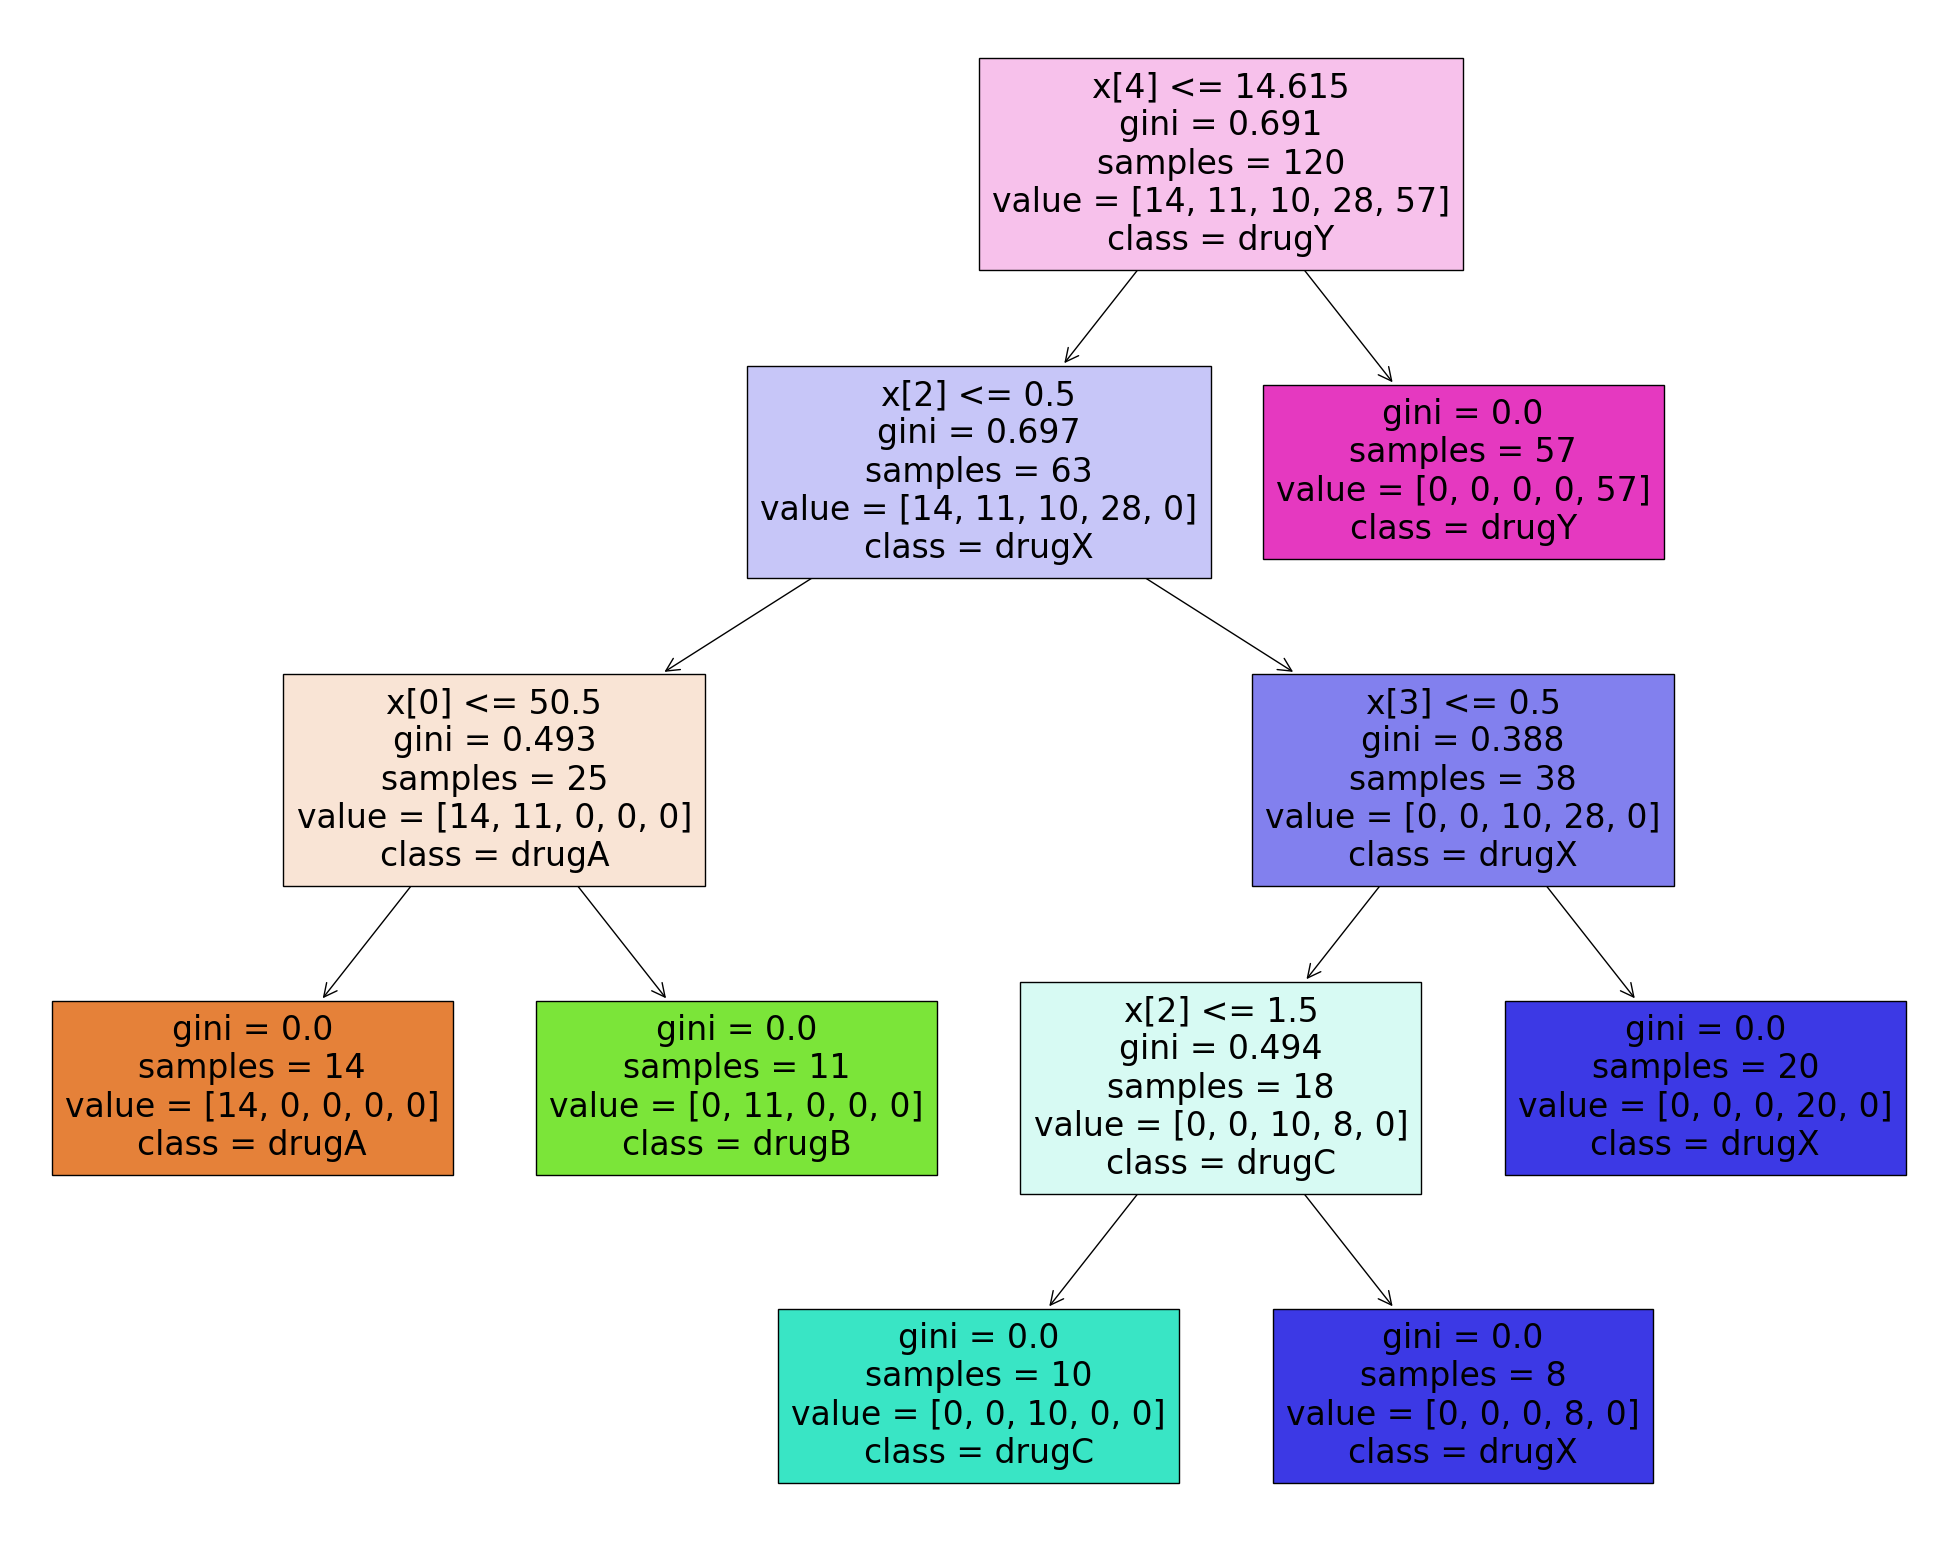

In [ ]:
# to plot tree
fig = plt.figure(figsize=(25,20))
_=tree.plot_tree(dte,class_names=["drugA","drugB","drugC","drugX","drugY"],filled=True)
fig.savefig("treeGini.png")

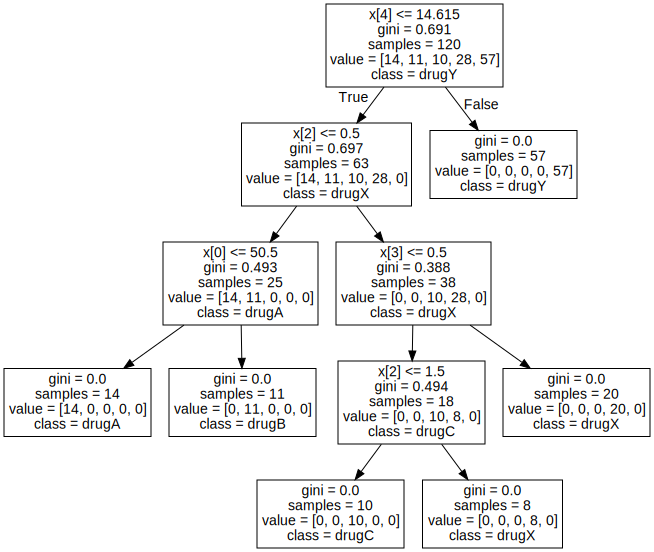

In [ ]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(dte,class_names=["drugA","drugB","drugC","drugX","drugY"])

# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph

In [ ]:
df1=df1=pd.read_csv('team data set drug.csv')

In [ ]:

def label_encoder(y):
    le = preprocessing.LabelEncoder()
    df1[y] = le.fit_transform(df1[y])
label_list = ["Sex","BP","Cholesterol","Drug"]

for l in label_list:
    label_encoder(l)
df1[0:10]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0
5,22,0,2,0,8.607,4
6,49,0,2,0,16.275,0
7,41,1,1,0,11.037,3
8,60,1,2,0,15.171,0
9,43,1,1,1,19.368,0


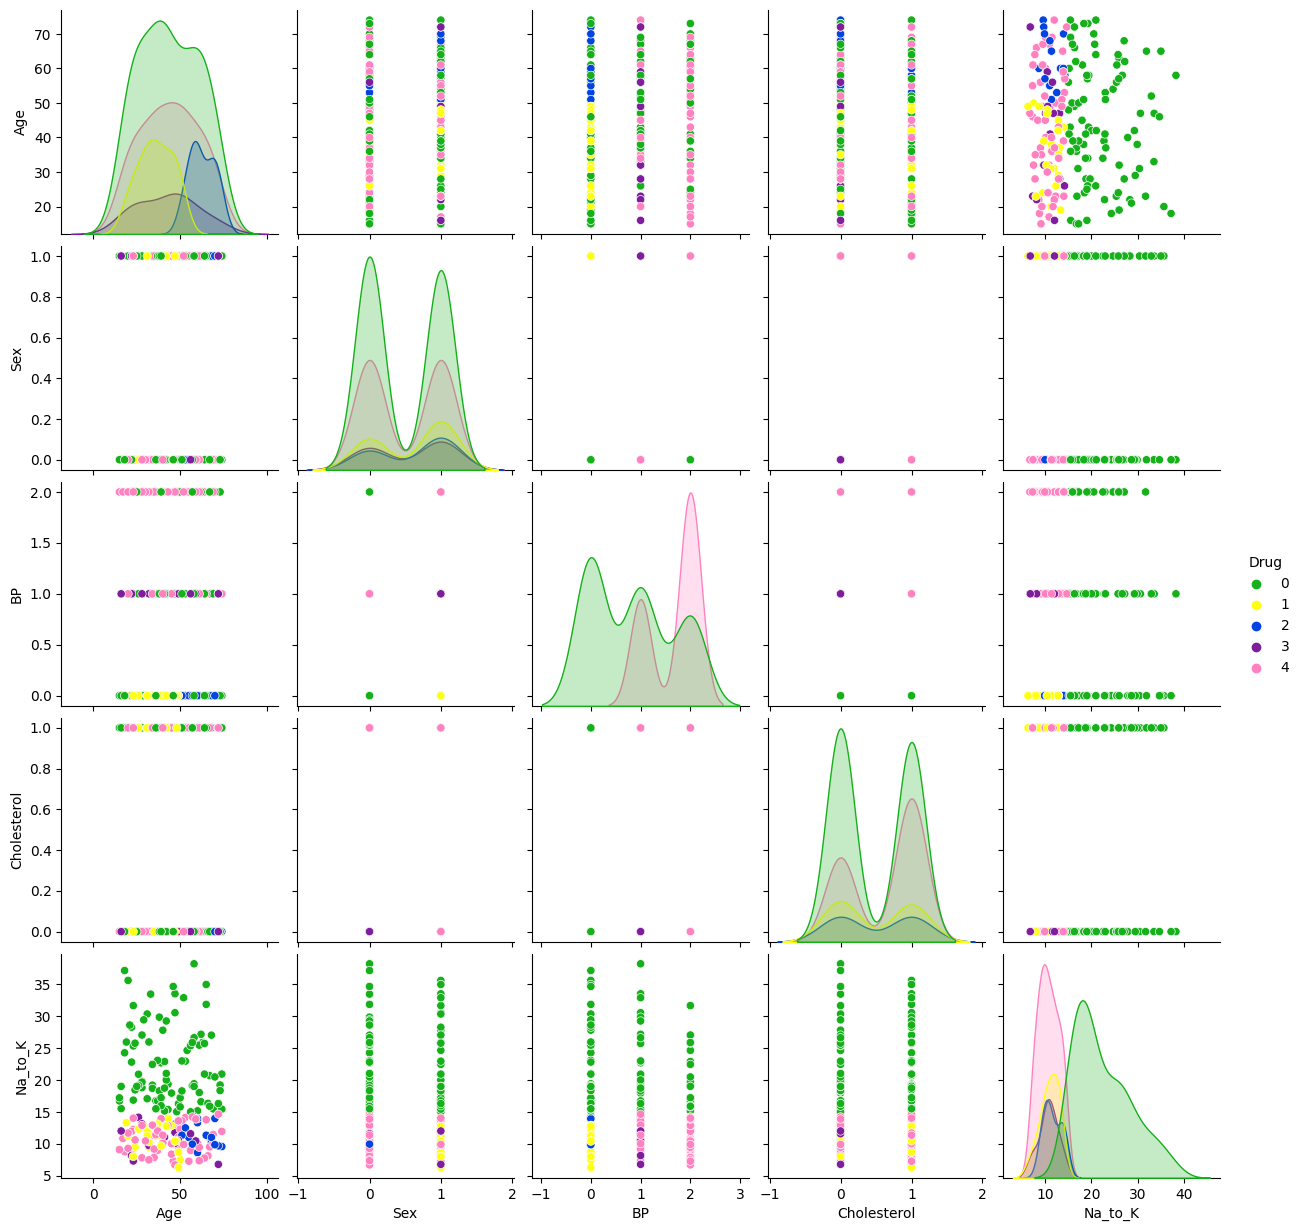

In [ ]:
colors = ['green', 'yellow', 'blue', 'purple','pink']
f=sns.pairplot(df1, hue='Drug', palette=sns.xkcd_palette(colors))
f.savefig('dt.png', dpi=400)

In [ ]:
df. groupby('Drug'). size()

Drug
DrugY    91
drugA    23
drugB    16
drugC    16
drugX    54
dtype: int64

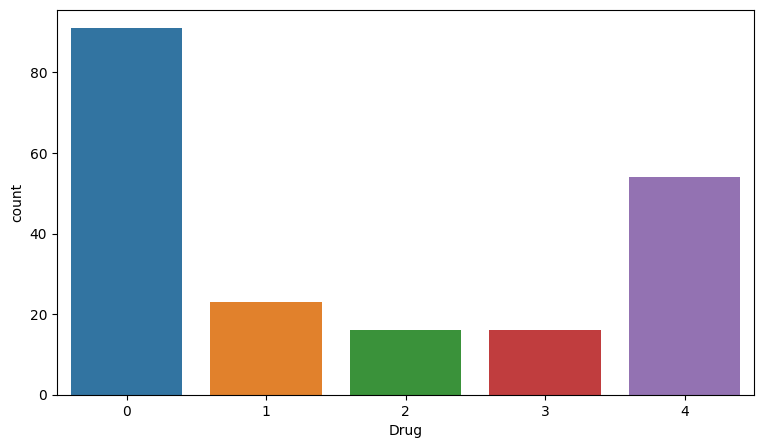

In [ ]:
fig=plt.figure(figsize = (9,5))
sns.countplot(x=df1["Drug"])
plt.show()
fig.savefig('count.png', dpi=400)

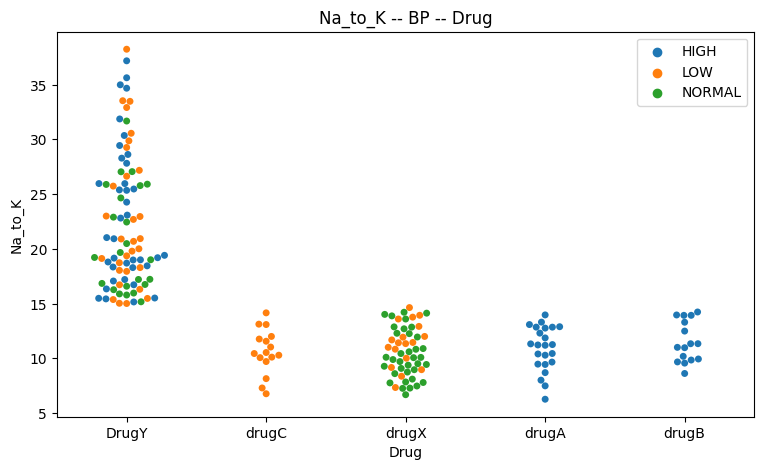

In [ ]:
p=plt.figure(figsize = (9,5))
sns.swarmplot(x = "Drug", y = "Na_to_K",hue="BP",data = df)
plt.legend()
plt.title("Na_to_K -- BP -- Drug")
plt.show()
p.savefig('bp.png', dpi=400)

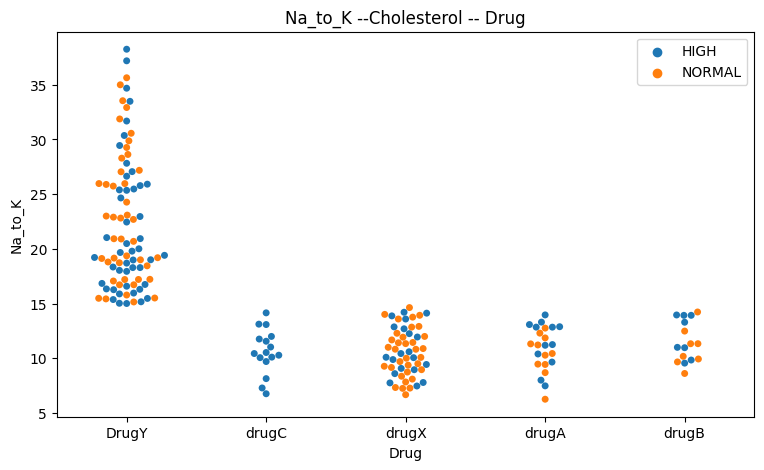

In [ ]:
p=plt.figure(figsize = (9,5))
sns.swarmplot(x = "Drug", y = "Na_to_K",hue="Cholesterol",data = df)
plt.legend()
plt.title("Na_to_K --Cholesterol -- Drug")
plt.show()
p.savefig('cholesterol.png', dpi=400)

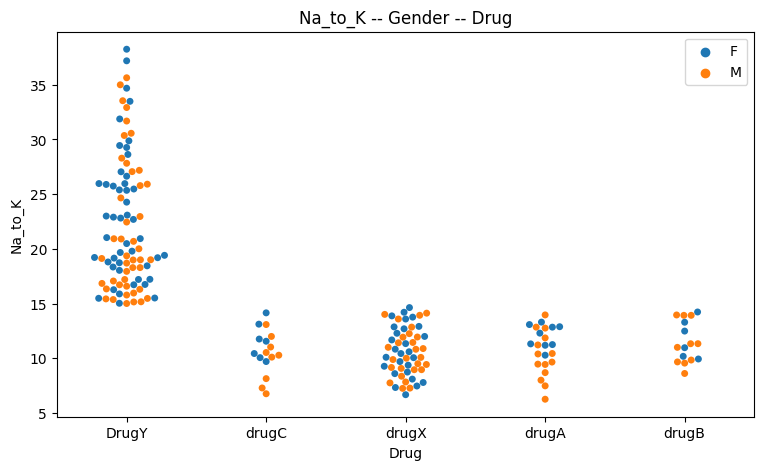

In [ ]:
p=plt.figure(figsize = (9,5))
sns.swarmplot(x = "Drug", y = "Na_to_K",hue="Sex",data = df)
plt.legend()
plt.title("Na_to_K -- Gender -- Drug")
plt.show()
p.savefig('Sex.png', dpi=400)

In [ ]:

y = df1["Drug"]
x = df1[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)
dte = DecisionTreeClassifier(criterion="gini", max_depth = 4)
y_score=dte.fit(x_train,y_train).predict_proba(x_test)
n_classes=5
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)



(40, 5)

In [ ]:
label_binarizer.transform(["drugC"])

/usr/local/lib/python3.9/dist-packages/numpy/lib/arraysetops.py:608: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


array([[0, 0, 0, 0, 0]])

In [ ]:
class_of_interest = 0
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

0

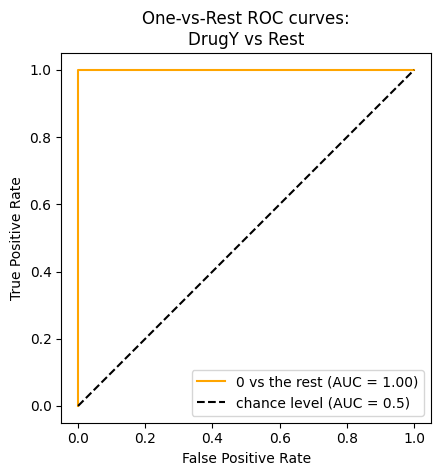

In [ ]:
from sklearn.metrics import RocCurveDisplay
s=""
if(n==0.2):
  s="blue"
elif(n==0.3):
  s="green"
else:
  s="orange"



RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score[:, class_id],
    name=f"{class_of_interest} vs the rest",
    color=s,
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\nDrugY vs Rest")
plt.legend()
plt.show()